In [1]:
import pandas as pd

In [4]:
download_url = (
   ...:     "https://raw.githubusercontent.com/fivethirtyeight/"
    ...:     "data/master/college-majors/recent-grads.csv"
   ...: )

In [6]:
df=pd.read_csv(download_url)

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


<Axes: xlabel='Rank'>

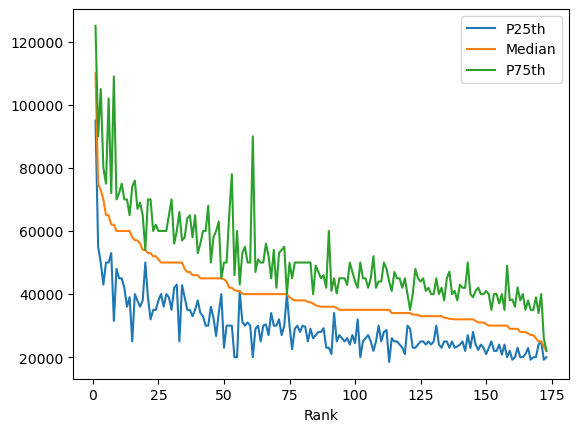

In [10]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

<Axes: xlabel='Rank'>

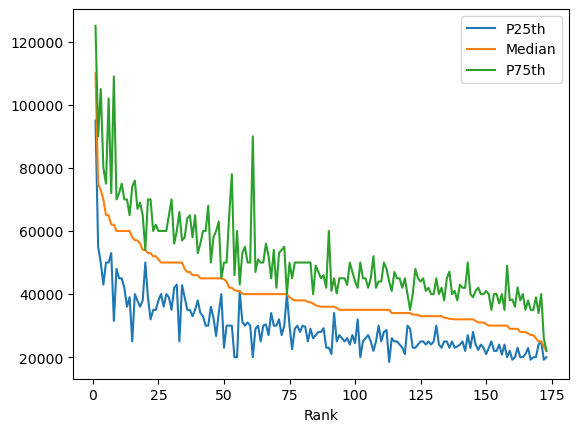

In [13]:

 df.plot(x="Rank", y=["P25th", "Median", "P75th"]) 
    


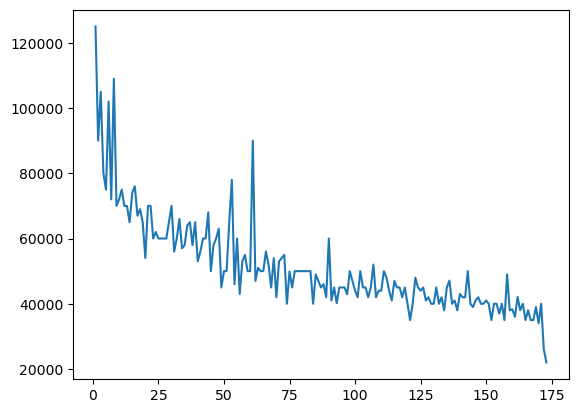

In [14]:
import matplotlib.pyplot as plt
plt.plot(df["Rank"], df["P75th"])

In [17]:
median_column = df["Median"]

<Axes: ylabel='Frequency'>

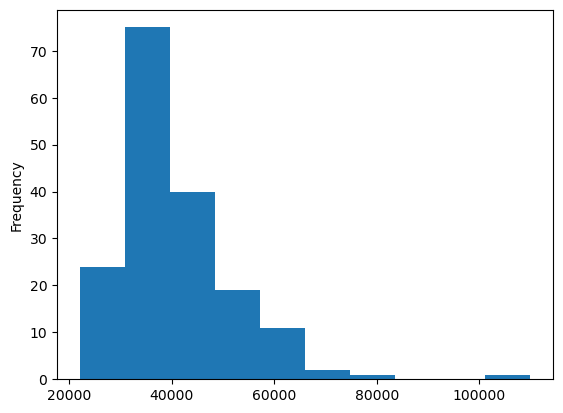

In [18]:
median_column.plot(kind="hist")

In [20]:
top_5 = df.sort_values(by="Median", ascending=False).head()

<Axes: xlabel='Major'>

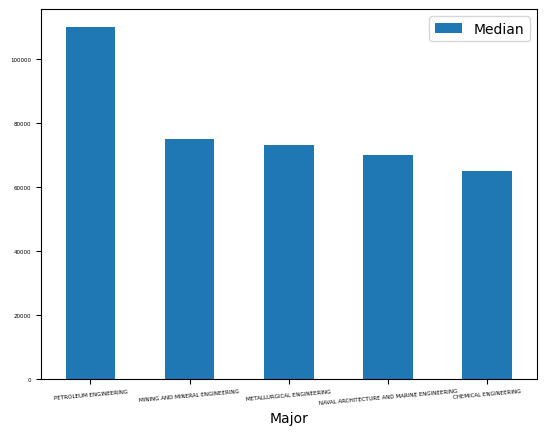

In [21]:
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4)


<Axes: xlabel='Major'>

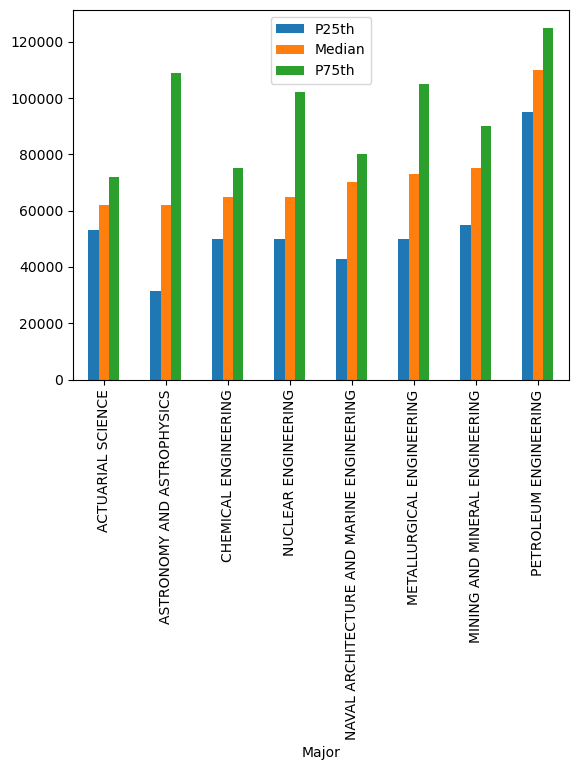

In [22]:
top_medians = df[df["Median"] > 60000].sort_values("Median")

top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

<Axes: xlabel='Median', ylabel='Unemployment_rate'>

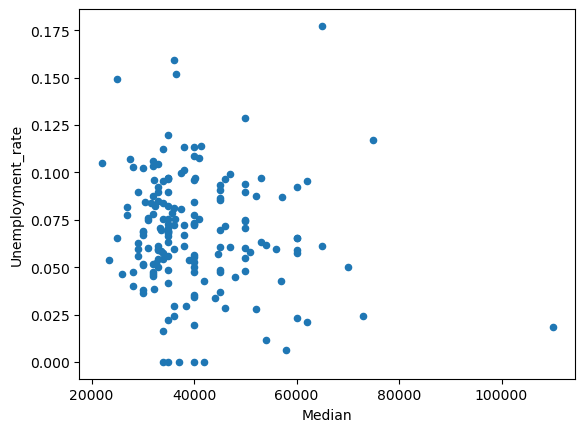

In [23]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

In [25]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()


In [26]:
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

<Axes: ylabel='Major_category'>

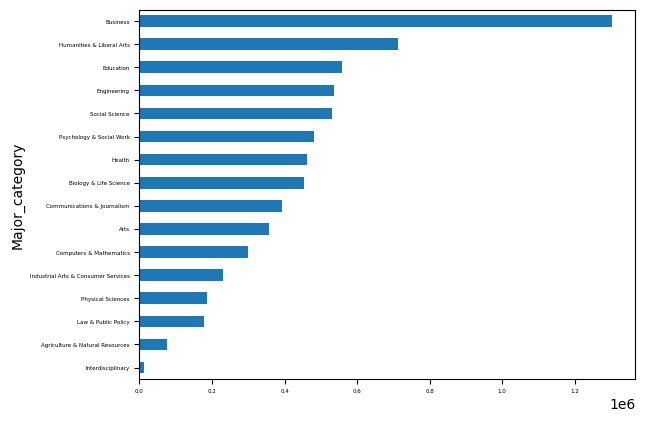

In [27]:
cat_totals.plot(kind="barh", fontsize=4)

In [28]:
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]

In [32]:
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])

 
 

In [34]:
big_cat_totals = big_cat_totals.append(small_sums)


C:\Users\gokul\AppData\Local\Temp\ipykernel_9808\1009533166.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_cat_totals = big_cat_totals.append(small_sums)


<Axes: >

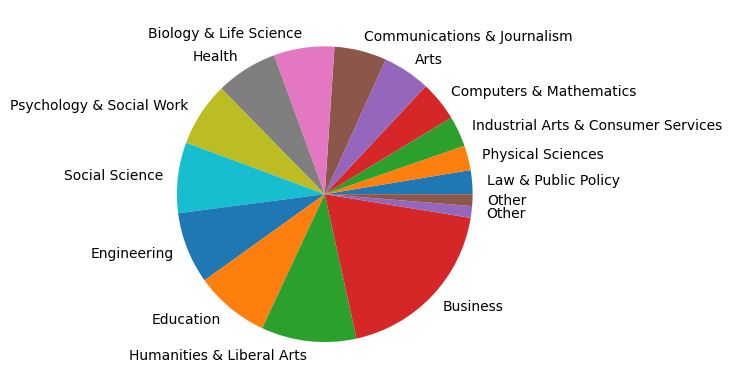

In [35]:
big_cat_totals.plot(kind="pie", label="")